In [ ]:
using OptimalApplication
using Random
# using Plots
using CairoMakie
using DataFrames
using Colors

accentcolor = (107,142,35) ./ 255

## Comparative statics example

In [8]:
mkt = Market([0.39, 0.33, 0.24, 0.24, 0.05, 0.03, 0.1, 0.12],
             collect(range(start=200, step=50, length=8)),
             8)

apporder, v = applicationorder_list(mkt, true)

invpermapporder = invperm(apporder)

8-element Vector{Int64}:
 4
 2
 6
 1
 7
 8
 5
 3

In [3]:
println(apporder)

[4, 2, 8, 1, 7, 3, 5, 6]


In [4]:
df = DataFrame("f" => mkt.f, "t" => mkt.t, "order" => invpermapporder, "v" => v[invpermapporder])
#=
 Row │ f        t        order  v       
     │ Float64  Float64  Int64  Float64 
─────┼──────────────────────────────────
   1 │    0.39    200      4  230.047
   2 │    0.33    250      2  146.7
   3 │    0.24    300      6  281.513
   4 │    0.24    350      1   84.0
   5 │    0.05    400      7  288.778
   6 │    0.03    450      8  294.106
   7 │    0.1     500      5  257.643
   8 │    0.12    550      3  195.096
=#
df

,f,t,order,v
,Float64,Int64,Int64,Float64
1,0.39,200,4,230.047
2,0.33,250,2,146.7
3,0.24,300,6,281.513
4,0.24,350,1,84.0
5,0.05,400,7,288.778
6,0.03,450,8,294.106
7,0.1,500,5,257.643
8,0.12,550,3,195.096


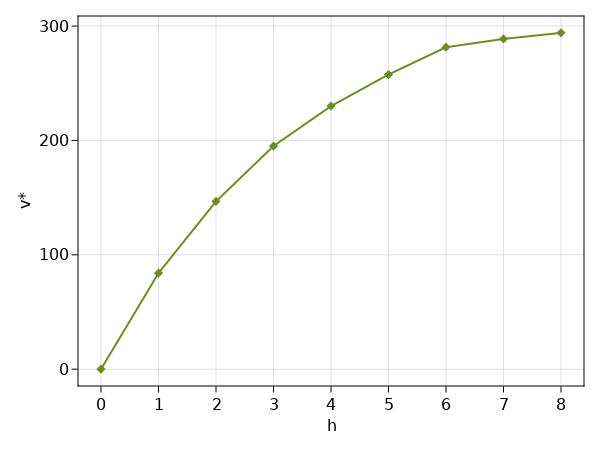

In [5]:
fig1 = Figure(resolution=(600, 450))

ax = fig1[1, 1] = Axis(fig1)

#try scatterlines!
scatter!(
    0:8,
    vcat(0, v),
    color=accentcolor,
    marker=:diamond,
    markersize=12,
    # legend=false,
)

lines!(
    0:8,
    vcat(0, v),
    linewidth=2,
    color=accentcolor,
)

ax.xticks = 0:8
ax.xlabel = "h"
ax.ylabel = "v*"

fig1

In [6]:
save("h_v-example.pdf", fig1)
save("h_v-example.png", fig1)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x000000000a997890, 600.0, 450.0)


## Sample random market

In [7]:
function make_correlated_market(m)
    A = 10
    t = ceil.(Int, 10 * randexp(m))
    sort!(t)
    f = inv.(t .+ 10 * rand(m))
    g = rand(5:10, m)
    H = sum(g) ÷ 2
    return f, t, g, H
end

randVCM(m) = VariedCostsMarket(make_correlated_market(m)...)
function randSCM(m)
    f, t, g, H = make_correlated_market(m)
    return SameCostsMarket(f, t, m ÷ 2)
end

randSCM (generic function with 1 method)

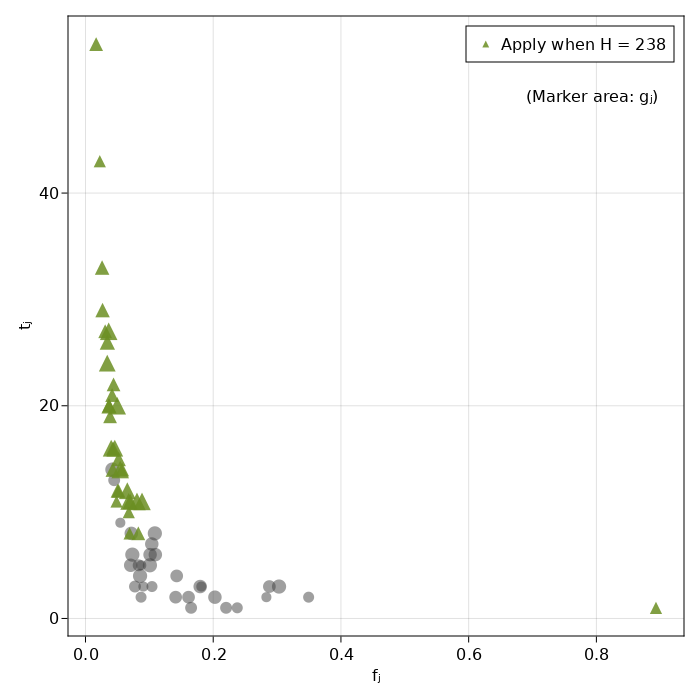

In [30]:
m = 64
mkt = randVCM(m)

X, v = optimalportfolio_dynamicprogram(mkt)

nX = setdiff(1:m, X)

scal = 1.5
# pl = plot(size = (500, 500), xlabel = "fⱼ", ylabel = "tⱼ", legend = :topright)
# scatter!(pl, mkt.f[nX], mkt.t[nX], ms = scal * sqrt.(mkt.g[nX]), c = :gray25, msc = :auto, ma = 0.5, label = nothing)
# scatter!(pl, mkt.f[X], mkt.t[X], m = :utriangle, ms = scal * sqrt.(mkt.g[X]), c = accentcolor, msc = :auto, ma = 0.85, label = "Apply when H = $(mkt.H)")
# annotate!(pl, [(maximum(mkt.f), 0.9 * maximum(mkt.t), text("(Marker area: gⱼ)  ", 9, :right))])

scal = 4.5
fig2 = Figure(resolution=(700, 700))

ax = fig2[1, 1] = Axis(fig2)

scatter!(mkt.f[nX], mkt.t[nX], markersize=scal * sqrt.(mkt.g[nX]), color=RGBA(0.25, 0.25, 0.25, 0.5)) #:gray25, strokealpha=0.5)
scatter!(mkt.f[X], mkt.t[X], marker=:utriangle, markersize=1.6 * scal * sqrt.(mkt.g[X]), color=RGBA(107 / 255, 142 / 255, 35 / 255, 0.85), label="Apply when H = $(mkt.H)")

ax.xlabel = "fⱼ"
ax.ylabel = "tⱼ"

axislegend(ax, position=:rt)
text!("(Marker area: gⱼ)", position=(maximum(mkt.f), 0.9 * maximum(mkt.t)), align=(:right, :baseline), textsize=16)

fig2

In [32]:
save("samplemarket.pdf", fig2)
save("samplemarket.png", fig2)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x000000000e040790, 700.0, 700.0)
